In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

target_dict = {
        "emo": [
            "Awe",
            "Excitement",
            "Amusement",
            "Awkwardness",
            "Fear",
            "Horror",
            "Distress",
            "Triumph",
            "Sadness",
            "Surprise"
        ],

        "aro_val": [
            "Arousal",
            "Valence"
        ]
    }

emo_targets = target_dict["emo"]
aro_val_targets = target_dict["aro_val"]


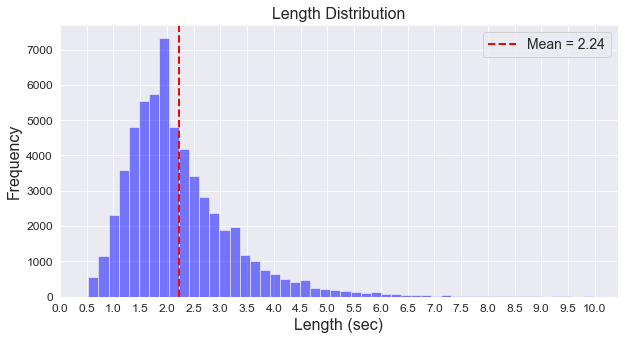

In [36]:
lengthdf = pd.read_csv('data_length_size.csv')

plt.figure(figsize=(10,5))
x = lengthdf['Length']
fontsize = 16
plt.rcParams['font.size'] = '12'
plt.hist(x, bins=50, color='blue', alpha=0.5)
plt.xticks(np.arange(0, max(x) + .5, step=.5))
plt.xlabel('Length (sec)', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
r = plt.title('Length Distribution', fontsize=fontsize)
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2)
plt.legend(['Mean = ' + str(round(x.mean(), 2))], fontsize=fontsize-2)
plt.savefig('results/img/length_distribution.png')

plt.show()

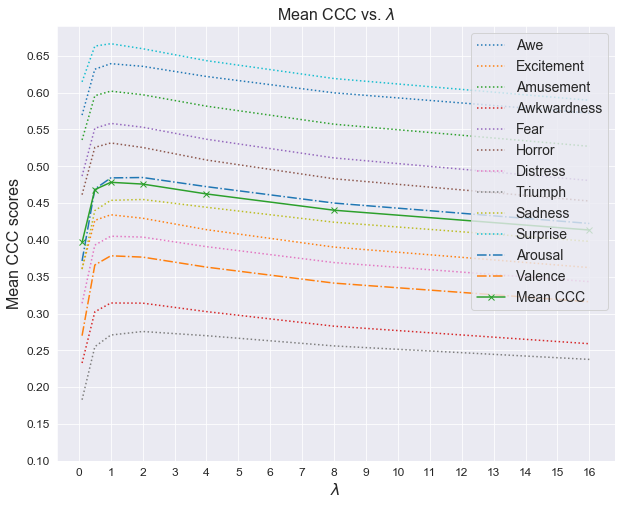

In [61]:
funcs_and_fv_df = pd.read_csv('results/exp_batch07_compare_llds_110pca_200gmm_fv_plus_compare_funcs/all_scores_both.csv')
aro_val_targets = target_dict['aro_val']
emo_targets = target_dict['emo']
x = funcs_and_fv_df['c']
plt.figure(figsize=(10,8))
for target in emo_targets:
    plt.plot(x, funcs_and_fv_df[target+'_ccc'], label=target, linestyle=':')
for target in aro_val_targets:
    plt.plot(x, funcs_and_fv_df[target+'_ccc'], label=target, linestyle='-.')
plt.plot(x, funcs_and_fv_df['mean_ccc'], label='Mean CCC', linestyle='solid', marker='x')
plt.xticks(np.arange(0, max(x) + 1, step=1))
plt.yticks(np.arange(0.1, 0.7, step=0.05))
plt.xlabel(r'$\lambda$', fontsize=fontsize)
plt.ylabel('Mean CCC scores', fontsize=fontsize)
plt.legend(fontsize=fontsize-2, loc='upper right')
plt.title(r'Mean CCC vs. $\lambda$', fontsize=fontsize)
plt.savefig('results/img/mean_ccc_vs_lambda.png')
plt.show()


In [79]:
df = funcs_and_fv_df.drop(['kernel', 'power'], axis=1)

df_ccc = df.drop(list(df.filter(regex = '_r')) + ['mean_ccc'] + list(df.filter(regex= 'Arousal|Valence')), axis = 1)
ccc_table = df_ccc.to_latex(index=False, float_format=lambda x: '{:.3f}'.format(x))
df_r = df.drop(list(df.filter(regex = '_ccc')) + list(df.filter(regex= 'Arousal|Valence')), axis = 1)
r_table = df_r.to_latex(index=False, float_format=lambda x: '{:.3f}'.format(x))
print(ccc_table)
print(r_table)

\begin{tabular}{rrrrrrrrrrr}
\toprule
     c &  Awe\_ccc &  Excitement\_ccc &  Amusement\_ccc &  Awkwardness\_ccc &  Fear\_ccc &  Horror\_ccc &  Distress\_ccc &  Triumph\_ccc &  Sadness\_ccc &  Surprise\_ccc \\
\midrule
 0.100 &    0.570 &           0.361 &          0.536 &            0.233 &     0.487 &       0.461 &         0.314 &        0.183 &        0.360 &         0.615 \\
 0.500 &    0.632 &           0.426 &          0.596 &            0.302 &     0.552 &       0.526 &         0.393 &        0.255 &        0.440 &         0.663 \\
 1.000 &    0.639 &           0.434 &          0.602 &            0.314 &     0.558 &       0.532 &         0.405 &        0.271 &        0.454 &         0.666 \\
 2.000 &    0.636 &           0.429 &          0.597 &            0.314 &     0.553 &       0.525 &         0.404 &        0.276 &        0.455 &         0.660 \\
 4.000 &    0.622 &           0.414 &          0.582 &            0.303 &     0.537 &       0.508 &         0.391 &        0.270

In [4]:
#write a function that takes a dataframe and returns a latex table
df_dict = {}
for result_folder in os.listdir(r"results"):
    if result_folder == 'img':
        continue
    emo_scores = pd.read_csv(r"results/" + result_folder + "/all_scores_emo.csv")
    aro_val_scores = pd.read_csv(r"results/" + result_folder + "/all_scores_aro_val.csv")
    emo_scores = emo_scores.drop(['kernel', 'power'], axis=1)
    aro_val_scores = aro_val_scores.drop(['kernel', 'power'], axis=1)
    df_dict[result_folder] = {'emo': emo_scores, 'aro_val': aro_val_scores}

In [6]:
print(df_dict['exp_batch07_compare_llds_110pca_200gmm_fv_plus_compare_funcs']['emo'])

      c  mean_ccc  Awe_ccc  Excitement_ccc  Amusement_ccc  Awkwardness_ccc  \
0   0.1    0.4118   0.5695          0.3608         0.5357           0.2328   
1   0.5    0.4784   0.6318          0.4265         0.5958           0.3023   
2   1.0    0.4875   0.6393          0.4341         0.6020           0.3143   
3   2.0    0.4849   0.6357          0.4294         0.5971           0.3141   
4   4.0    0.4714   0.6219          0.4139         0.5816           0.3026   
5   8.0    0.4492   0.5997          0.3902         0.5571           0.2828   
6  16.0    0.4223   0.5722          0.3624         0.5271           0.2590   

   Fear_ccc  Horror_ccc  Distress_ccc  Triumph_ccc  ...     Awe_r  \
0    0.4867      0.4614        0.3139       0.1829  ...  0.664989   
1    0.5516      0.5257        0.3929       0.2549  ...  0.685607   
2    0.5582      0.5316        0.4050       0.2708  ...  0.679481   
3    0.5530      0.5255        0.4038       0.2756  ...  0.663711   
4    0.5367      0.5085       